In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import dataset

In [6]:
train = pd.read_csv(r"C:\Users\User\Desktop\Fake.csv", encoding='latin1') 
test = pd.read_csv(r"C:\Users\User\Desktop\True.csv", encoding='latin1')

In [7]:
train['target'] = 'fake'
test['target'] = 'true'

In [11]:
# Concatenate dataframes
data1 = pd.concat([train, test]).reset_index(drop = True)
data1.shape

(44898, 6)

In [9]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(23481, 6) (21417, 6) (44898, 6)


In [12]:
data1.head()

,title,text,subject,date,target,source
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,fake,train
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,fake,train
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,fake,train
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,fake,train
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,fake,train


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
 5   source   44898 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [14]:
data.describe()

,title,text,subject,date,target,source
count,44898,44898,44898,44898,44898,44898
unique,38729,38646,8,1136,2,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,20-Dec-17,fake,train
freq,14,627,11272,197,23481,23481


In [15]:
# checking the number of missing data
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
source     0
dtype: int64

target
fake    23481
true    21417
Name: text, dtype: int64


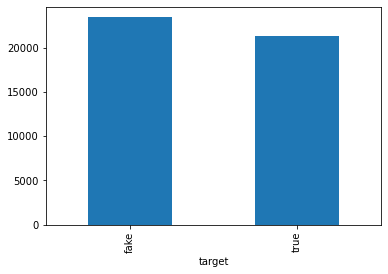

In [16]:
# How many fake and real articles?

print(data1.groupby(['target'])['text'].count())
data1.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


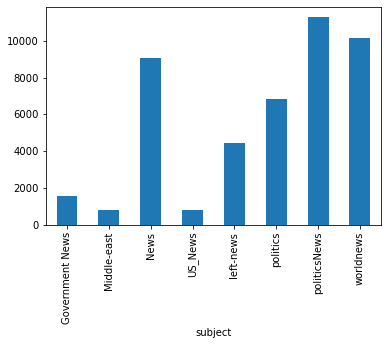

In [18]:
# How many articles per subject?

print(data1.groupby(['subject'])['text'].count())
data1.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [19]:
# keeping only the useful columns for NLP

corpus = data[['title', 'text', 'target']]
corpus.head()

,title,text,target
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake


## DATA PREPROCESSING

# Lower case

In [20]:
corpus['text_lower'] = corpus['text'].str.lower()

# Removing puncutuations

In [21]:
import string

punct_to_remove = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punct_to_remove))

corpus["text_wo_punct"] = corpus["text_lower"].apply(lambda text: remove_punctuation(text))

# Word tokenization

In [22]:
from nltk.tokenize import word_tokenize

corpus['text_token'] = [word_tokenize(entry) for entry in corpus['text_wo_punct']]

# takes a while

# Stop words removal

In [23]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    return [w for w in text if not w in stopwords]

corpus['text_wo_stop'] = corpus['text_token'].apply(lambda x : remove_stopwords(x))

# Word lemmatization

In [24]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def lemmatize_words(text):
    return [wnl.lemmatize(word) for word in text]

corpus["text_lemmatized"] = corpus["text_wo_stop"].apply(lambda text: lemmatize_words(text))

corpus.head()

,title,text,target,text_lower,text_wo_punct,text_token,text_wo_stop,text_lemmatized
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,fake,donald trump just couldn t wish all americans ...,donald trump just couldn t wish all americans ...,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, wish, american, happy, new, ye..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake,"on friday, it was revealed that former milwauk...",on friday it was revealed that former milwauke...,"[on, friday, it, was, revealed, that, former, ...","[friday, revealed, former, milwaukee, sheriff,...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",fake,"on christmas day, donald trump announced that ...",on christmas day donald trump announced that h...,"[on, christmas, day, donald, trump, announced,...","[christmas, day, donald, trump, announced, wou...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake,pope francis used his annual christmas day mes...,pope francis used his annual christmas day mes...,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ...","[pope, francis, used, annual, christmas, day, ..."


In [46]:
# Take the lemmatized text as features

corpus_final = corpus[['text_lemmatized','target']]

corpus_final.head()

,text_lemmatized,target
0,"[donald, trump, wish, american, happy, new, ye...",fake
1,"[house, intelligence, committee, chairman, dev...",fake
2,"[friday, revealed, former, milwaukee, sheriff,...",fake
3,"[christmas, day, donald, trump, announced, wou...",fake
4,"[pope, francis, used, annual, christmas, day, ...",fake


In [163]:
from sklearn import preprocessing

def convert(data):
    number = preprocessing.LabelEncoder()
    data['title'] = number.fit_transform(data['title'])
    data=data.fillna(-999) # fill holes with default value
    return data

In [79]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = asarray([['title'], ['text'], ['subject']])
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)

[['title']
 ['text']
 ['subject']]
[[2.]
 [1.]
 [0.]]


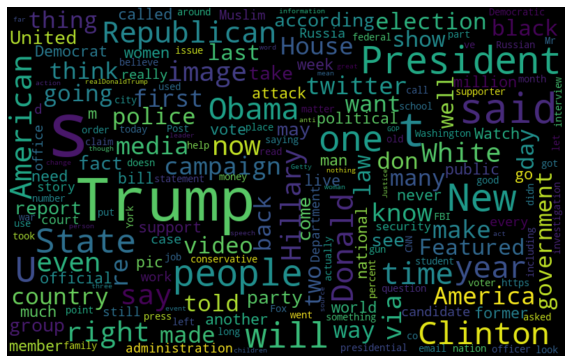

In [83]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data1[data1["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

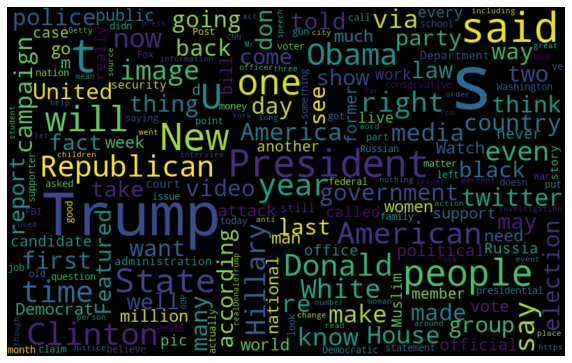

In [91]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data1[data1["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()

# converting back the lemmatized tokens into sentences documents again with .join
# .join combines each words together with a space between them

features = Tfidf_vect.fit_transform(corpus_final['text_lemmatized'].apply(lambda x: ' '.join(x)))


In [98]:
type(features)

scipy.sparse.csr.csr_matrix

In [99]:
print(features)

  (0, 98159)	0.017331898936070806
  (0, 38060)	0.060394855632800476
  (0, 21777)	0.03412521377540832
  (0, 138443)	0.0759024516582241
  (0, 123449)	0.025545115193745492
  (0, 12530)	0.05084563018904552
  (0, 216048)	0.027610141904385446
  (0, 154657)	0.02114299820949009
  (0, 83494)	0.02241518702654571
  (0, 42681)	0.04226171615151798
  (0, 195198)	0.03241901714820568
  (0, 92104)	0.04030615146639849
  (0, 209055)	0.028000029742814528
  (0, 7216)	0.050322215698854415
  (0, 161054)	0.0759024516582241
  (0, 138427)	0.027511427307220695
  (0, 79392)	0.04625471662278719
  (0, 212500)	0.0759024516582241
  (0, 212492)	0.052473949395570714
  (0, 192918)	0.024106346568307
  (0, 192462)	0.041319101009962174
  (0, 23481)	0.03581191564941594
  (0, 193922)	0.0759024516582241
  (0, 174703)	0.0759024516582241
  (0, 170235)	0.04056611854866977
  :	:
  (44897, 38684)	0.05883783239830709
  (44897, 77304)	0.03949882382754981
  (44897, 51890)	0.02766342974598098
  (44897, 59515)	0.049787062642178755
  (4

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    corpus_final['target'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [102]:
from sklearn.naive_bayes import MultinomialNB

Naive_clf = MultinomialNB()

Naive_clf.fit(X_train, y_train)

MultinomialNB()

In [103]:
# prediction

y_predict_nb = Naive_clf.predict(X_test)

In [104]:
from sklearn.metrics import classification_report
nb_cr = classification_report(y_test,y_predict_nb)

print(nb_cr)

              precision    recall  f1-score   support

        fake       0.97      0.94      0.95      4733
        true       0.94      0.97      0.95      4247

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



In [169]:
y_predict_nb = Naive_clf.predict(X_train)

In [170]:
from sklearn.metrics import classification_report
nb_cr = classification_report(y_train,y_predict_nb)

print(nb_cr)

              precision    recall  f1-score   support

        fake       0.98      0.95      0.96     18748
        true       0.95      0.98      0.96     17170

    accuracy                           0.96     35918
   macro avg       0.96      0.96      0.96     35918
weighted avg       0.96      0.96      0.96     35918



[[4450  283]
 [ 147 4100]]


<AxesSubplot:>

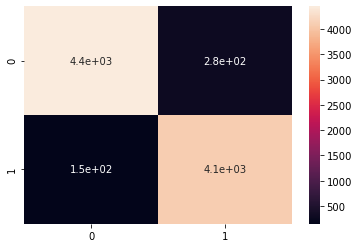

In [105]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test,y_predict_nb)
print(nb_cm)

import seaborn as sns
sns.heatmap(nb_cm, annot=True)

In [171]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [109]:
lr_preds = lr.predict(X_test)

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [111]:
dt_preds = dt.predict(X_test)

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [113]:
rf_preds = rf.predict(X_test)

In [114]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[10:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
xgb_preds = xgb.predict(X_test)

<AxesSubplot:>

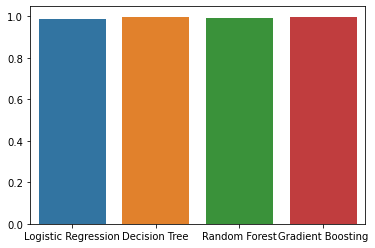

In [116]:
model = np.array(['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting'])
from sklearn.metrics import accuracy_score
scores = np.array([accuracy_score(lr_preds,y_test),accuracy_score(dt_preds,y_test),accuracy_score(rf_preds,y_test),accuracy_score(xgb_preds,y_test)])
df = {'model': model, 'scores': scores}
sns.barplot(x='model',y='scores',data=df)

In [117]:

# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

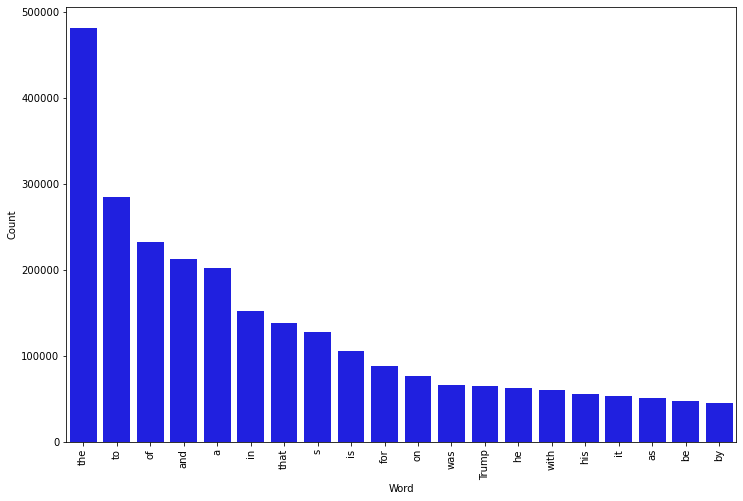

In [119]:
# Most frequent words in fake news
counter(data1[data1["target"] == "fake"], "text", 20)

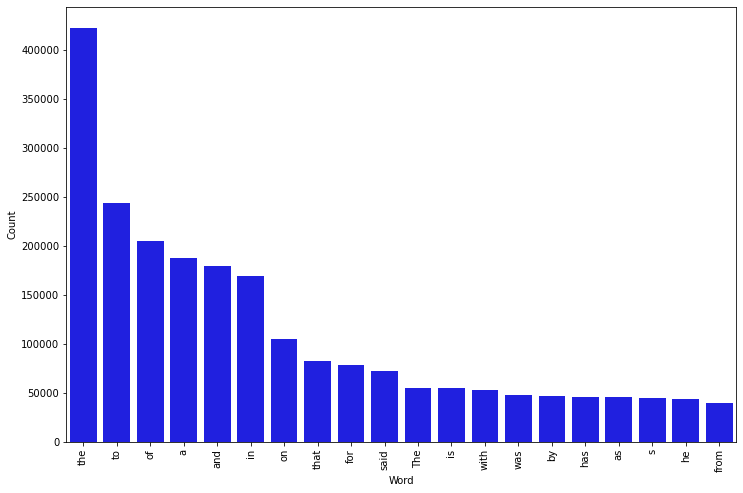

In [121]:
# Most frequent words in real news
counter(data1[data1["target"] == "true"], "text", 20)

In [26]:
data1['label']=pd.get_dummies(data.target)['fake']

In [33]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data1['text'], data1.target, test_size=0.2, random_state=42)

## Modeling 

In [34]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.63%


Confusion matrix, without normalization


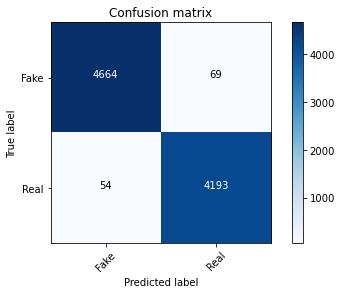

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [36]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.62%
